# Kernel PCA Implementation for loading HSI. Dataset: SalinasA

In [25]:
from umap_script import loadHSI, show_clusterable_embedding, visualize_umap, compare_umap, k_means, calculate_aligned_accuracy, plot

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

In [3]:
salinasA_path = 'data/SalinasA_corrected.mat'
salinasA_gt_path = 'data/SalinasA_gt.mat'

X, M, N, D, HSI, GT, Y, n, K = loadHSI(salinasA_path, salinasA_gt_path, 'salinasA_corrected', 'salinasA_gt')

In [39]:
def show_kernelPCA_2d(hsi_data, ground_truth):
#     clusterable_embedding = umap.UMAP(
#       n_neighbors=30,
#       min_dist=0.0,
#       n_components=2,
#       random_state=42,
#   ).fit_transform(hsi_data)
    transformer = KernelPCA(n_components=2, kernel='rbf')
    X_transformed = transformer.fit_transform(hsi_data)    

    plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
              c=ground_truth, s=0.1, cmap='Spectral')

    return X_transformed

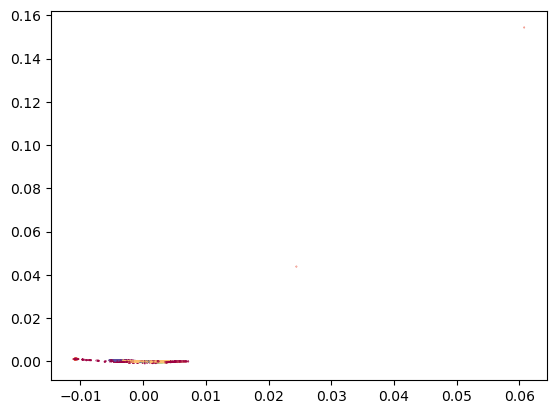

In [40]:
X_transformed = show_kernelPCA_2d(HSI, GT)

In [24]:
def visualize_kernelPCA(data_reshaped, ground_truth, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    transformer = KernelPCA(n_components=2, kernel='cosine')
    u = transformer.fit_transform(data_reshaped)   
    # rotation_3d(u = u, n_components=n_components,ground_truth=ground_truth,title=title)
    return u

In [32]:
def compare_pca(data,ground_truth,dataset_name,compare_dim = None,compare_neighbors = None):
    kpca_ari = []
    kpca_aligned_acc = []
    pca_ari = []
    pca_aligned_acc = []
    dims = [1,2,3,4]
    if (compare_neighbors):
        for i in range(1,len(dims)):            
            pca_plot = visualize_kernelPCA(data,num=dims[i])
            k_means_kpca_ari, k_means_lle_labels = k_means(ground_truth,dim_reduced_data = pca_plot, n_components =3, method = "KPCA")
            k_means_pca_ari, k_means_pca_labels = k_means(ground_truth, data = data, n_components= 3, method = "PCA")

            kpca_ari.append(k_means_kpca_ari)
            pca_ari.append(k_means_pca_ari)

            kpca_acc = calculate_aligned_accuracy(ground_truth, k_means_lle_labels)
            pca_acc = calculate_aligned_accuracy(ground_truth, k_means_pca_labels)

            kpca_aligned_acc.append(kpca_acc)
            pca_aligned_acc.append(pca_acc)
        dims = dims[1:]
        plot(dims,kpca_ari, pca_ari,kpca_aligned_acc,pca_aligned_acc, plot_title = 'Adjusted Rand Index (ARI) vs. Number of Neighbors for ' + dataset_name, x_label = 'Number of Neighbors', dim_label = 'Kernel PCA')

In [ ]:
compare_pca(HSI, GT, 'Salinas A', compare_dim=True, compare_neighbors=False)